# **Linear Regression on Encrypted Data**

## **Table of Contents**

1. [**Multiple Linear Regression in Clear**](#1)
    1. [Training](#training)
    2. [Predictions](#predictions)
2. [**Multiple Linear Regression on Encrypted Data**](#2)
 1. [Encryption](#2.1)
 2. [Training](#2.2)
 3. [Decryption](#2.3)
 4. [Predictions](#2.4)



## Dependencies
Run this cell and restart the kernel:

In [45]:
pip install -U matplotlib numpy scikit-learn pandas

  Using cached pytz-2024.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2024.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 19.1 MB/s eta 0:00:001m20.3 MB/s eta 0:00:01
Using cached pytz-2024.2-py2.py3-none-any.whl (508 kB)
Using cached tzdata-2024.2-py2.py3-none-any.whl (346 kB)
Note: you may need to restart the kernel to use updated packages.


<a name="1"></a>
## **1. Multiple Linear Regression in Clear**

<a name="training"></a>
## **1.1 Training**
We train our model using a linear regression on X_train:
1. def of the partial derivatives
2. def of the gradient descent

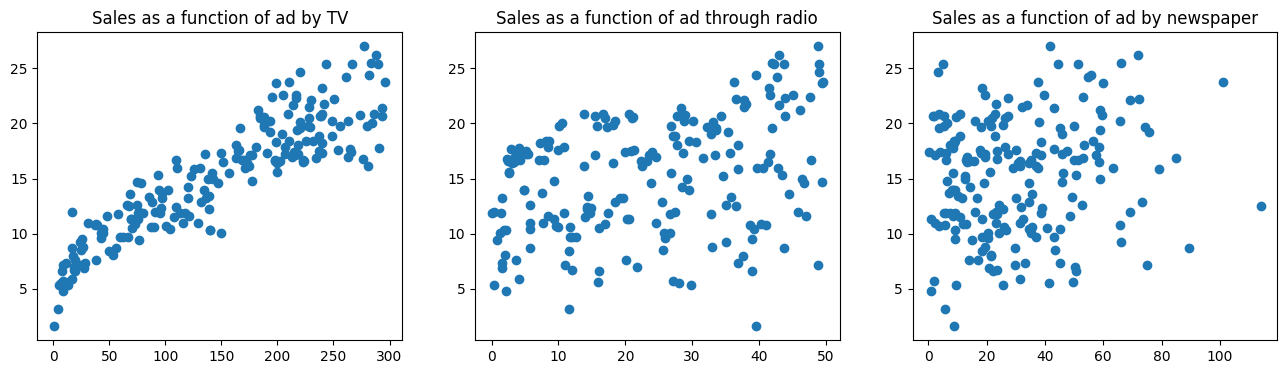

In [42]:
# Defining the training set.
import numpy as np
import matplotlib.pyplot as plt

# 1.
X_train = np.array([
    [2104, 5, 1, 45],
    [1416, 3, 2, 40],
    [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# 2. Training dataset setup
import pandas as pd
df = pd.read_csv('datasets/advertising.csv')
X_train_row = []
X_train_row_1col = []
for i in range(df.shape[0]):
    X_train_row.append(df.iloc[i][0:-1])
    X_train_row_1col.append(df.iloc[i][0:1])
    # X_train_row.append(df.iloc[i][0:-1])
X_train = np.array(X_train_row)
X_train_1col = np.array(X_train_row_1col)
y_train = np.array(df['Sales'])

# Plot the dataset
fig, axs = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns
axs[0].set_title("Sales as a function of ad by TV")
axs[1].set_title("Sales as a function of ad through radio")
axs[2].set_title("Sales as a function of ad by newspaper")

for i in range(3):
    axs[i].scatter(X_train[:,i],y_train)


In [21]:
def cost(w,b):
    """ Mean squared error (cost function). """

    J = 0
    m = X_train.shape[0]
    for i in range(m):
        J += ( X_train[i,:] @ w + b - y_train[i] ) ** 2
    J *= 1/m

    return J,w

In [22]:
def predict(X, w, b):
    return X @ w + b

In [70]:
def gradients_simple (X,y,w,b):
    m = X.shape[0]
    dJ_dw = 0
    dJ_db = 0
    for i in range(m):
        error = X[i] * w + b - y[i]
        dJ_dw += 2*X[i]*error
        dJ_db += 2*error
    dJ_dw *= 1/(float(m))
    dJ_db *= 1/(float(m))
    return dJ_dw,dJ_db
    
def onevar_gradient_descent(X,y,w,b,alpha,epoch):
    m = X.shape[0]
    dJ_dw = 0
    dJ_db = 0
    for j in range(epoch):
        w_tmp = w - alpha * gradients_simple(X,y,w,b)[0]
        b_tmp = b - alpha * gradients_simple(X,y,w,b)[1]
        w = w_tmp
        b = b_tmp
    return w,b

In [71]:
# Function from "The Hundred Pages Machine Learning"
def update_w_and_b(spendings, sales, w, b, alpha):
    dl_dw = 0.0
    dl_db = 0.0
    N = len(spendings)
    for i in range(N):
        dl_dw += -2*spendings[i]*(sales[i] - (w*spendings[i] + b))
        dl_db += -2*(sales[i] - (w*spendings[i] + b))
    # update w and b
    w = w - (1/float(N))*dl_dw*alpha
    b = b - (1/float(N))*dl_db*alpha
    return w, b

In [72]:
w = 0.
b = 0.
alpha = 5e-5
epoch = 100
a0 = onevar_gradient_descent(X_train_1col,y_train,w,b,alpha,1)
a1 = update_w_and_b(X_train_1col,y_train,w,b,alpha)
print(a0)
print(a1)

(array([0.26316104]), array([0.00151305]))
(array([0.26316104]), array([0.00151305]))


In [73]:
# Returns all partial derivatives dJ/dwj
def gradients (X,y,w,b):
    """ 
        Args:
            X,y,w,b such as y = X @ w + b 
            
            Where y = [y0 y1 ... ym] and so on such as:
            y0 = x00* w0 + x01*w1 + ... + x0n*wn + b
            y1 = x10* w0 + x11*w1 + ... + x1n*wn + b
            ....
            ym = xm0* w0 + xm1*w1 + ... + xmn*wn + b

            dJ_dw[j] is the j-th partial derivative relative to wj
    """
    m,n = X.shape

    dJ_dw = np.zeros(n)
    dJ_db = 0.
    for i in range(m):
        error = X[i] @ w + b - y[i]
        for j in range(n):
            dJ_dw[j] +=  X[i,j] * error
        dJ_db = dJ_db + error
    dJ_dw = dJ_dw/m
    dJ_db = dJ_db/m

    return dJ_dw , dJ_db

In [74]:
# Compare values on X_tr
m = X_train_1col.shape[0]
w = 0.
b = 0.
g = gradients(X_train_1col,y_train,w,b)

ValueError: matmul: Input operand 1 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [27]:
# b_init = 785.1811367994083
# w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
b_init = 0
w_init = np.zeros(X_train.shape[1])

tmp_dj_dw,tmp_dj_db = gradients(X_train, y_train, w_init, b_init)
print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: -15.130500000000005
dj_dw at initial w,b: 
 [-2631.61045  -379.287    -480.3838 ]


In [28]:
import math, copy
# Andrew Ng's version from Coursera
def gradient_descent (X,y,w_in,b_in,alpha,iterations):
    m = X.shape[0]
    n = X.shape[1]
    # w = w_in
    w = copy.deepcopy(w_in)
    b = b_in

    history = []

    for i in range(iterations):
        dJ_dw , dJ_db = gradients(X,y,w,b)
        # for j in range(n):
        w = w - alpha * dJ_dw
        b = b - alpha * dJ_db

        c = cost(w,b)
        history.append(cost)

        if i% math.ceil(iterations / 10) == 0:
            print(f'Iteration {i:4d} | Cost: {c}')
    return w,b,history

In [29]:
# Z-score normalization
def my_mean(X):
    m,n = X.shape
    means = np.zeros(n)
    for j in range(n):
        for i in range(m):
            means[j] += X[i,j]
    means = means / m
    return means

def my_std(X):
    m,n = X.shape
    std_devs = np.zeros(n)
    means = my_mean(X)
    for j in range(n):
        for i in range(m):
            std_devs[j] += (X[i,j] - means[j]) ** 2
    std_devs = np.sqrt(std_devs / m)
    return std_devs

def zscore_normalize_(X):
    m,n = X.shape
    means = np.zeros(n)
    std_devs = np.zeros(n)
    X_norm = np.zeros(X.shape)

    means = my_mean(X)

    for j in range(n):
        for i in range(m):
            std_devs[j] += (X[i,j] - means[j]) ** 2
    std_devs = np.sqrt(std_devs / m)

    X_norm = (X - means) / std_devs

    return X_norm

def zscore_normalize(X):
    mu = np.mean(X,axis=0)
    sigma = np.std(X,axis=0)
    X_norm = (X-mu) / sigma
    return X_norm

In [30]:
assert( zscore_normalize(X_train)[i] == zscore_normalize_(X_train)[i] for i in range(X_train.shape[1]) )

In [32]:
# initialize parameters
initial_w = np.zeros_like(w_init)
initial_b = 0.
# some gradient descent settings
iterations = 1000
alpha = 5.0e-10
# alpha = 0.0000005
my_result = gradient_descent(X_train,y_train,initial_w,initial_b,alpha,iterations)
my_coefs = my_result[0] # everything from start to last - 1
my_bias = my_result[1] # last

predictions = predict(X_train,my_coefs,my_bias)



print('My Results:')
print(f'My Coefficients: {my_coefs}')
print(f'My Bias: {my_bias}')

print(f'y_train:{y_train}')
print(f'predictions:{predictions}')

Iteration    0 | Cost: (np.float64(256.70464982525095), array([1.31580522e-06, 1.89643500e-07, 2.40191900e-07]))
Iteration  100 | Cost: (np.float64(255.9757415653169), array([1.32795713e-04, 1.91415386e-05, 2.42428653e-05]))
Iteration  200 | Cost: (np.float64(255.2490253409348), array([2.64076583e-04, 3.80687954e-05, 4.82128655e-05]))
Iteration  300 | Cost: (np.float64(254.52449455549714), array([3.95158717e-04, 5.69714510e-05, 7.21502416e-05]))
Iteration  400 | Cost: (np.float64(253.8021426322496), array([5.26042413e-04, 7.58495421e-05, 9.60550425e-05]))
Iteration  500 | Cost: (np.float64(253.08196301422817), array([6.56727970e-04, 9.47031057e-05, 1.19927317e-04]))
Iteration  600 | Cost: (np.float64(252.3639491642025), array([0.00078722, 0.00011353, 0.00014377]))
Iteration  700 | Cost: (np.float64(251.6480945646161), array([0.00091751, 0.00013234, 0.00016757]))
Iteration  800 | Cost: (np.float64(250.9343927175244), array([0.0010476 , 0.00015112, 0.00019135]))
Iteration  900 | Cost: (n

<a name="predictions"></a>
## **1.2 Predictions**
We compare our result to scikit's results.

In [33]:
# Test with sklearn:
from sklearn import linear_model
sklearn_reg = linear_model.LinearRegression()
sklearn_reg.fit(X_train,y_train)

print('sklearn result:')
print(f'sklearn Coefficients: {sklearn_reg.coef_}')
print(f'sklearn Bias: {sklearn_reg.intercept_}')

print(f'sklearn preditc: : {sklearn_reg.predict(X_train)}')

sklearn result:
sklearn Coefficients: [0.05444578 0.10700123 0.00033566]
sklearn Bias: 4.625124078808652
sklearn preditc: : [21.22097209 11.26824775 10.49620897 17.31244651 15.64413685 10.35633677
 11.2732847  13.27062458  5.31839603 15.78871013  8.8527202  18.88400523
  9.69879662 10.74921373 19.27328852 20.38554445 12.27105794 24.20214502
 10.5924398  15.20872794 19.49794066 18.10414656  7.06177654 18.87221072
  9.37145421 19.31996936 15.54479137 19.49216302 21.07865408 10.19471067
 23.61492832 12.64683045 10.08782551 21.2260486   9.98787085 20.89407055
 23.84503494 13.99342411  9.8404516  21.08344935 18.04712878 17.84885818
 23.57494339 16.79762772  8.75617872 16.57668108 10.58020572 22.13342743
 18.70257411  9.53181337 15.84670856 11.11990058 20.88243422 19.53008343
 22.01500291 20.76038994  8.04320903 14.10063486 21.4222098  19.25650785
  7.75915886 23.43911942 19.32168181 13.3867616  16.35231896  9.37729644
  8.97313482 13.7643628  20.49677834 21.13545307 18.75250649 12.14402868


<a name="2"></a>
## **2. Multiple Linear Regression on Encrypted Data**


<a name="2.1"></a>
## **2.1 Encryption**

In [ ]:
x = np.arange(0, 20, 1)
y = 1 + x**2
X = x.reshape(-1, 1)

print(x)
print(y)
print(X)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[  1   2   5  10  17  26  37  50  65  82 101 122 145 170 197 226 257 290
 325 362]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]
